## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

Importing the required libraries 

In [31]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# We are setting the seed to assure you get the same answers on quizzes as we set up

random.seed(42)

1. Now, read in the ab_data.csv data. Store it in df. Use your dataframe to answer the questions in Quiz 1 of the classroom.

a. Read in the dataset and take a look at the top few rows here:

Loading the dataset into the df dataframe

In [32]:
df = pd.read_csv('ab_data.csv')

Visualizing the first few rows of dataset that is being loaded.

In [33]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

Number of rows present in the dataset.

In [34]:
df.shape[0]

294478

c. The number of unique users in the dataset.

Number of unique users present in the dataset.

In [35]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

Number of users converted.

In [36]:
df['converted'].sum()

35237

Proportion of Users converted

In [37]:
df['converted'].sum() / df.shape[0]

0.11965919355605512

e. The number of times the new_page and treatment don't line up.

The number of times the new_page and treatment don't line up.

In [38]:
# Mismatch dataframe for the old_page users

no_mismatch_oldpage = df[(df['landing_page'] == 'old_page') & (df['group'] == 'treatment')]

# Number of times that the mismatch occurs for the treatment group users

print(len(no_mismatch_oldpage))

# Mismatch dataframe for the new_page users

no_mismatch_newpage = df[(df['landing_page'] == 'new_page') & (df['group'] == 'control')]

# Number of times that the mismatch occurs for the control group users

print(len(no_mismatch_newpage))

# Total number of times that the mismatch occurs

print(len(no_mismatch_oldpage)+len(no_mismatch_newpage))   

1965
1928
3893


f. Do any of the rows have missing values?

Checking for rows that have any missing values in the dataset.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


From the above results we can state that the dataset has 294478 rows and for every column in the dataset has 294478 entries. 

So that there are no null values in the dataset.

`2.` For the rows where `treatment` is not aligned with `new_page` or `control` is not aligned with `old_page`, we cannot be sure if this row truly received the new or old page. Use `Quiz 2` in the classroom to provide how we should handle these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in `df2`.

For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page.

Removing all mismatched rows in the dataframe and storing into df2 dataframe

In [40]:
# Creating an new dataframe that holds all mismatched rows

mismatch_all = pd.concat([no_mismatch_newpage, no_mismatch_oldpage])

In [41]:
# Creating a new dataframe df2 such that it holds all values except mismatched values

df2 = df

# Dropping all mismatched values from the df2 dataframe

df2.drop(mismatch_all.index,inplace=True)

In [42]:
# Double Check all of the correct rows were removed - this should be 0

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use df2 and the cells below to answer questions for Quiz3 in the classroom.

a. How many unique user_ids are in df2?

Number of unique_id users in the df2 dataframe.

In [43]:
len(df2['user_id'].unique())

290584

b. There is one user_id repeated in df2. What is it?

Number of non unique_id users in the df2 dataframe.

In [44]:
len(df2['user_id']) - len(df2['user_id'].unique())

1

c. What is the row information for the repeat user_id?

Information regarding the duplicated user_id

In [45]:
df2[df2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.

Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.

In [46]:
df2.drop(labels=1899, axis=0, inplace=True)

Checking whether any duplicated users present the dataframe or not.

In [47]:
len(df2[df2.duplicated(['user_id'],keep=False)])

0

Hence from the above result, depicts that no dupliacted rows present in the dataframe.

`4.` Use df2 in the below cells to answer the quiz questions related to Quiz 4 in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

Probability of an individual converting regardless of the page they receive?

In [48]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the control group, what is the probability they converted?

In [49]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the treatment group, what is the probability they converted?

In [50]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [51]:
len(df2[df2['landing_page'] == 'new_page']) / len(df2)

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions? Write your response below.

Given that an individual was in the treatment group, the probability they converted is 0.118808

Given that an individual was in the control group, the probability they converted is 0.120386

Based on the information above, it can be concluded that there is not much to differentiate the performance of both the pages. Subsequently,we can say that there not much evidence yet to state the above.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null-hypothesis

$H_0:  p_{new} - p_{old} \leq 0$

i.e. The null hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be equal to zero or lower than zero.

Alternative-hypothesis

$H_1:  p_{new} - p_{old} > 0$

i.e. The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be greater than zero.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [52]:
pnew = df2[df2['landing_page']=='new_page']['converted'].mean()

# Displaying the result

pnew

0.11880806551510564

In [53]:
pold = df2[df2['landing_page']=='old_page']['converted'].mean()

# Displaying the result

pold

0.1203863045004612

In [54]:
# Mean of the probabilities

pmean = np.mean([pnew,pold])

# Displaying the result

pmean

0.11959718500778342

In [55]:
# Calc differences in probability of conversion for new and old page (not under H_0)

pdiff = pnew-pold

# Displaying the result

pdiff

-0.0015782389853555567

Hence:

$p_{new}: 0.1188$

$p_{old}: 0.1204$

a. What is the convert rate for $p_{new}$ under the null?

$p_{mean}=p_{old_0}=p_{new_0}: 0.1196$

b. What is the convert rate for $p_{old}$ under the null? 

As above.

$p_{new_0} - p_{old_0} = 0

c. What is $n_{new}$?

In [56]:
nnew = len(df2[df2['group'] == 'treatment'])

# Displaying the result

nnew

145310

d. What is $n_{old}$?

In [57]:
nold = len(df2[df2['group'] == 'control'])

# Displaying the result

nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null. 

In [58]:
new_converted = np.random.choice([1, 0], size=nnew, p=[pmean, (1-pmean)])

# Displaying the mean of the result

new_converted.mean()

0.11922785768357305

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null. 

In [59]:
old_converted = np.random.choice([1,0], size=nold, p=[pmean, (1-pmean)])

# Displaying the mean of the result

old_converted.mean()

0.11860346655285874

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [60]:
old_converted.mean() - new_converted.mean()

-0.0006243911307143163

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts 

**a. through g.** above. Store all 10,000 values in p_diffs.

In [61]:
p_diffs = []

for _ in range(10000):
    new_converted = np.random.choice([1, 0], size=nnew, p=[pmean, (1-pmean)]).mean()
    old_converted = np.random.choice([1, 0], size=nold, p=[pmean, (1-pmean)]).mean()
    diff = new_converted - old_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs.** Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.

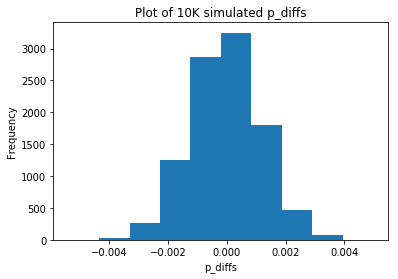

In [62]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [63]:
# Compute difference from original dataset ab_data.csv

actual_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()

# Displaying the actual difference

actual_diff

-0.0015782389853555567

In [64]:
p_diffs = np.array(p_diffs)

p_diffs

array([ 0.00064488,  0.00089963, -0.00066272, ..., -0.00033929,
       -0.00190868, -0.00154386])

In [65]:
(p_diffs > actual_diff).mean()

0.9051

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

ANSWER:

As we are computing p-values here, which is the probability of observing statistic when if null hypothesis is true.

From the above results we can say that both old and new pages are performing similarly. Hence Null hypothesis is true.
And there is no advantage of conversion of new pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [66]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])

convert_new = sum(df2.query("group == 'treatment'")['converted'])

n_old = len(df2.query("group == 'control'"))

n_new = len(df2.query("group == 'treatment'"))

print(convert_old, convert_new, n_old, n_new)

/Users/akhilreddy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [67]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

# Displaying the z_score and p_value

print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts **j.** and **k.**?

In [68]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values 

0.9050583127590245
1.6448536269514722


These values agrees with the findings of i and j.

we found that z_score is less than the critical value. (i.e, z_score = 1.31092419842 and critical_value = 1.64485362695)

So, Null Hypothesis is accepted and we can conclude that old pages are performing better than the new pages.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [76]:
df_new = df2 

In [78]:
df_new['intercept'] = pd.Series(np.zeros(len(df_new)), index=df_new.index)
df_new['ab_page'] = pd.Series(np.zeros(len(df_new)), index=df_new.index)

In [80]:
# Find indexes that need to be changed for treatment group

index_change = df_new[df_new['group']=='treatment'].index

# Change values

df_new.set_value(index=index_change, col='ab_page', value=1)
df_new.set_value(index=df_new.index, col='intercept', value=1)

# Change datatype

df_new[['intercept', 'ab_page']] = df_new[['intercept', 'ab_page']].astype(int)

# Move "converted" to RHS

df_new = df_new[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

/Users/akhilreddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/akhilreddy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/akhilreddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/akhilreddy/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [81]:
df_new[df_new['group']=='treatment'].head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [84]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Set up logistic regression

logit = sm.Logit(df_new['converted'], df_new[['ab_page', 'intercept']])

# Calculate results

results=logit.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        23:41:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Summary of model is mentioned above

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with **ab_page** is 0.190 which suggests that there is not much difference in conversion rate between the newly treated page and old page, i.e both new_page and old_page are equally statistically significant with regards to converting users. $$ H_0: p_{new} = p_{old} $$$$ H_1: p_{new} \neq p_{old} $$


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We should also consider other factors into regression model as they might influence the conversations too.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [72]:
countries_df = pd.read_csv('./countries.csv')

In [73]:
# Visualizing the first few rows of countries_df dataframe

countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [86]:
# Creating dummy variables

df_dummy = pd.get_dummies(data=countries_df, columns=['country'])

# Performing join

df_final = df_dummy.merge(df_new, on='user_id') 

# Sorting columns

df_final = df_final[['user_id', 'timestamp', 'group', 'landing_page', 
           'ab_page', 'country_CA', 'country_UK', 'country_US',
           'intercept', 'converted']]

# Fix Data Types

df_final[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
df_final[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

df_final.head()

,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,0,1,0,1,0


In [89]:
# Create logit_countries object

logit_countries = sm.Logit(df_final['converted'], 
                           df_final[['country_UK', 'country_US', 'intercept']])

# Fitting in the model

results_fit = logit_countries.fit()

# Displaying the summary

results_fit.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:               1.521e-05
Time:                        23:48:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

It seems that country did have some bearing on conversion rate, but not high enough to be satistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [91]:
# Create logit_countries object

logit_ctries = sm.Logit(df_final['converted'], 
                           df_final[['ab_page', 'country_UK', 'country_US', 'intercept']])

# Fitting into the model

result_ctries = logit_ctries.fit()

# Displaying the summary

result_ctries.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        23:53:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

In [48]:
np.exp(results.params)

CA    0.130350
US    0.135779
dtype: float64

In [92]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

When adding everything together it seems that the p-values for all featues has increased. The z-score for the intercept is incredibly large though which is interesting.

## Conclusions from Regression

As in this logistic regression model too, we find that the values do not show a substantial difference in teh conversion rates for control group and treatment group.

This indicates that we can acceot the Null Hypothesis and keep the existing page as is.

<a id='conclusions'></a>
## Conclusions 

The performance of the old page was found better as computed by different techniques.

Hence, we accept the Null Hypothesis and Reject the Alternate Hypothesis.

These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data.

### Resources and References

https://github.com/statsmodels/statsmodels/issues/3931

Udacity Nanodegree videos and Resources